# [Project 6: Classifying Point Clouds with PointNet](https://github.gatech.edu/cs4476/project-6)

For this project, we are going to build deep learning architectures to classify point clouds that were extracted from self-driving car LiDAR scans.

Basic learning objectives of this project:
* Construct the basic pipeline used for point cloud classification
* Analyze the results from our model and look for potential points of improvement
* Understand the limitations of the model and improve it using positional encodings

## Setup

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import torch
from vision.utils import verify

Lets take a second to visualize a few point clouds that we are going to train our model on. You might need to rotate the visualization before you can actually see the object being represented by the points. See if you can make out this pedestrian's arms, legs, and head.

In [2]:
from vision.utils import plot_cloud_from_file

plot_cloud_from_file('data/sweeps/PEDESTRIAN/11.txt')

## Part 1: Data Loading

The first order of business we're going to take care of is writing a PyTorch dataset that will load in the data we'll be using to train and test our model. We have a total of 20 different classes that all found under the `data/sweeps` folder and each class has been split into a training and testing set. We will write a class that will load the appropriate data given the split we pass in (i.e. train/test split).

**TODO 1:** complete `part1_dataloader.py`

In [3]:
from vision.part1_dataloader import Argoverse
from torch.utils.data import DataLoader
from tests.test_part1 import (
    test_dataset_length, 
    test_unique_values, 
    test_get_points_from_file, 
    test_pad_points, 
    test_class_values
)

In [4]:
print("test_dataset_length(): ", verify(test_dataset_length))
print("test_unique_values(): ", verify(test_unique_values))
print("test_get_points_from_file(): ", verify(test_get_points_from_file))
print("test_pad_points(): ", verify(test_pad_points))
print("test_class_values(): ", verify(test_class_values))

test_dataset_length():  "Correct"
test_unique_values():  "Correct"
test_get_points_from_file():  "Correct"
test_pad_points():  "Correct"
test_class_values():  "Correct"


Now we can load in our data. When extracting object point clouds from LiDAR scans, we pruned point clouds with large numbers of points to reduce the computational demand of training and testing our classifiers. We pruned all point clouds to have a maximum of 200 points so that is the size that we will be padding all of the other point clouds to. (Feel free to adjust the batch size if you find a value that works better with your implementation)

In [5]:
train_dataset = Argoverse('train', 'data/sweeps', 200)
test_dataset = Argoverse('test', 'data/sweeps', 200)

train_loader = DataLoader(train_dataset, batch_size=16, num_workers=4, persistent_workers=True, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, num_workers=4, persistent_workers=True, shuffle=True)

## Part 2: Baseline

A very simple baseline to start with is a voxel-based approach. Our overall point cloud falls in a 4x4x4 meter volume in space. We can divide this up into 1x1x1 meter volumes which would give us a total of 64 $1m^3$ cells. We build a 64-dimensional feature for a point by simply counting how many points in the point cloud fall into each cell then normalizng the resulting feature vector.

For more details see the project pdf.

**TODO 2:** complete `part2_baseline.py`

In [10]:
from vision.part2_baseline import Baseline
from torch import optim
from vision.training import train, test
from tests.test_part2 import (
    test_count_points,
    test_baseline
)

In [7]:
print("test_count_points(): ", verify(test_count_points))
print("test_baseline(): ", verify(test_baseline))

test_count_points():  "Correct"
test_baseline():  "Correct"


Lets train our baseline implementation and see how it does. Fill in the hyperparameters and train your model.

To get full credit for this section, you will need *$\geq$ 30%* accuracy on the test data set. The TAs were able to consistently achieve this accuracy with ~15 epochs

In [9]:
lr = 1e-2
weight_decay = 1e-5
epochs = 20

model = Baseline(20)
optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

In [10]:
train_acc, train_loss, test_acc, test_loss = train(model, optimizer, epochs, train_loader, test_loader)

Epoch 1

Training...


100%|██████████| 213/213 [00:08<00:00, 24.25it/s]



Testing...


100%|██████████| 38/38 [00:02<00:00, 13.55it/s]



Epoch 1 Stats:
	Training accuracy: 0.2412
	Training loss: 2.8130
	Validation accuracy: 0.1983
	Validation loss: 2.7442

Validation accuracy improved from 0 to 0.19833333790302277
Saving model to Baseline.pt


Epoch 2

Training...


100%|██████████| 213/213 [00:03<00:00, 69.93it/s]



Testing...


100%|██████████| 38/38 [00:00<00:00, 63.76it/s]



Epoch 2 Stats:
	Training accuracy: 0.3171
	Training loss: 2.5078
	Validation accuracy: 0.1850
	Validation loss: 2.6464


Epoch 3

Training...


100%|██████████| 213/213 [00:03<00:00, 70.45it/s]



Testing...


100%|██████████| 38/38 [00:00<00:00, 68.64it/s]



Epoch 3 Stats:
	Training accuracy: 0.3535
	Training loss: 2.3421
	Validation accuracy: 0.1817
	Validation loss: 2.6017


Epoch 4

Training...


100%|██████████| 213/213 [00:02<00:00, 72.03it/s]



Testing...


100%|██████████| 38/38 [00:00<00:00, 66.77it/s]



Epoch 4 Stats:
	Training accuracy: 0.3621
	Training loss: 2.2426
	Validation accuracy: 0.2017
	Validation loss: 2.5972

Validation accuracy improved from 0.19833333790302277 to 0.2016666680574417
Saving model to Baseline.pt


Epoch 5

Training...


100%|██████████| 213/213 [00:03<00:00, 68.71it/s]



Testing...


100%|██████████| 38/38 [00:00<00:00, 68.33it/s]



Epoch 5 Stats:
	Training accuracy: 0.3738
	Training loss: 2.1788
	Validation accuracy: 0.2067
	Validation loss: 2.5935

Validation accuracy improved from 0.2016666680574417 to 0.20666666328907013
Saving model to Baseline.pt


Epoch 6

Training...


100%|██████████| 213/213 [00:03<00:00, 67.59it/s]



Testing...


100%|██████████| 38/38 [00:00<00:00, 67.50it/s]



Epoch 6 Stats:
	Training accuracy: 0.3832
	Training loss: 2.1341
	Validation accuracy: 0.1983
	Validation loss: 2.6021


Epoch 7

Training...


100%|██████████| 213/213 [00:03<00:00, 68.23it/s]



Testing...


100%|██████████| 38/38 [00:00<00:00, 66.25it/s]



Epoch 7 Stats:
	Training accuracy: 0.3862
	Training loss: 2.1003
	Validation accuracy: 0.2050
	Validation loss: 2.5945


Epoch 8

Training...


100%|██████████| 213/213 [00:03<00:00, 68.54it/s]



Testing...


100%|██████████| 38/38 [00:00<00:00, 67.90it/s]



Epoch 8 Stats:
	Training accuracy: 0.3924
	Training loss: 2.0734
	Validation accuracy: 0.2150
	Validation loss: 2.6081

Validation accuracy improved from 0.20666666328907013 to 0.2150000035762787
Saving model to Baseline.pt


Epoch 9

Training...


100%|██████████| 213/213 [00:03<00:00, 69.09it/s]



Testing...


100%|██████████| 38/38 [00:00<00:00, 67.31it/s]



Epoch 9 Stats:
	Training accuracy: 0.3941
	Training loss: 2.0525
	Validation accuracy: 0.2300
	Validation loss: 2.6065

Validation accuracy improved from 0.2150000035762787 to 0.23000000417232513
Saving model to Baseline.pt


Epoch 10

Training...


100%|██████████| 213/213 [00:03<00:00, 66.00it/s]



Testing...


100%|██████████| 38/38 [00:00<00:00, 67.66it/s]



Epoch 10 Stats:
	Training accuracy: 0.4053
	Training loss: 2.0359
	Validation accuracy: 0.2150
	Validation loss: 2.6134


Epoch 11

Training...


100%|██████████| 213/213 [00:03<00:00, 67.96it/s]



Testing...


100%|██████████| 38/38 [00:00<00:00, 70.09it/s]



Epoch 11 Stats:
	Training accuracy: 0.4085
	Training loss: 2.0201
	Validation accuracy: 0.2233
	Validation loss: 2.6289


Epoch 12

Training...


100%|██████████| 213/213 [00:03<00:00, 68.71it/s]



Testing...


100%|██████████| 38/38 [00:00<00:00, 68.03it/s]



Epoch 12 Stats:
	Training accuracy: 0.4079
	Training loss: 2.0079
	Validation accuracy: 0.2250
	Validation loss: 2.6257


Epoch 13

Training...


100%|██████████| 213/213 [00:03<00:00, 70.95it/s]



Testing...


100%|██████████| 38/38 [00:00<00:00, 68.47it/s]



Epoch 13 Stats:
	Training accuracy: 0.4138
	Training loss: 1.9969
	Validation accuracy: 0.2383
	Validation loss: 2.6287

Validation accuracy improved from 0.23000000417232513 to 0.2383333295583725
Saving model to Baseline.pt


Epoch 14

Training...


100%|██████████| 213/213 [00:03<00:00, 62.85it/s]



Testing...


100%|██████████| 38/38 [00:00<00:00, 60.76it/s]



Epoch 14 Stats:
	Training accuracy: 0.4153
	Training loss: 1.9879
	Validation accuracy: 0.2250
	Validation loss: 2.6386


Epoch 15

Training...


100%|██████████| 213/213 [00:03<00:00, 68.98it/s]



Testing...


100%|██████████| 38/38 [00:00<00:00, 66.71it/s]



Epoch 15 Stats:
	Training accuracy: 0.4165
	Training loss: 1.9787
	Validation accuracy: 0.2267
	Validation loss: 2.6446


Epoch 16

Training...


100%|██████████| 213/213 [00:03<00:00, 69.36it/s]



Testing...


100%|██████████| 38/38 [00:00<00:00, 59.52it/s]



Epoch 16 Stats:
	Training accuracy: 0.4162
	Training loss: 1.9719
	Validation accuracy: 0.2300
	Validation loss: 2.6388


Epoch 17

Training...


100%|██████████| 213/213 [00:03<00:00, 70.23it/s]



Testing...


100%|██████████| 38/38 [00:00<00:00, 67.36it/s]



Epoch 17 Stats:
	Training accuracy: 0.4226
	Training loss: 1.9638
	Validation accuracy: 0.2383
	Validation loss: 2.6557


Epoch 18

Training...


100%|██████████| 213/213 [00:03<00:00, 67.81it/s]



Testing...


100%|██████████| 38/38 [00:00<00:00, 67.42it/s]



Epoch 18 Stats:
	Training accuracy: 0.4235
	Training loss: 1.9574
	Validation accuracy: 0.2400
	Validation loss: 2.6594

Validation accuracy improved from 0.2383333295583725 to 0.23999999463558197
Saving model to Baseline.pt


Epoch 19

Training...


100%|██████████| 213/213 [00:03<00:00, 68.22it/s]



Testing...


100%|██████████| 38/38 [00:00<00:00, 67.90it/s]



Epoch 19 Stats:
	Training accuracy: 0.4265
	Training loss: 1.9531
	Validation accuracy: 0.2417
	Validation loss: 2.6616

Validation accuracy improved from 0.23999999463558197 to 0.24166665971279144
Saving model to Baseline.pt


Epoch 20

Training...


100%|██████████| 213/213 [00:03<00:00, 65.90it/s]



Testing...


100%|██████████| 38/38 [00:00<00:00, 66.82it/s]


Epoch 20 Stats:
	Training accuracy: 0.4312
	Training loss: 1.9466
	Validation accuracy: 0.2350
	Validation loss: 2.6498




In [11]:
model = torch.load('output/Baseline.pt')
test_acc, test_loss = test(model, test_loader)

100%|██████████| 38/38 [00:00<00:00, 70.81it/s]

Test accuracy: 0.2417
Test loss: 2.6530


## Part 3: PointNet

Now that we have a baseline to compare to, we're going to build a simplified version of PointNet which was first published in 2017 by researchers at Stanford University. You can view the original website for this publication [here](https://stanford.edu/~rqi/pointnet/). 

We will be slightly modifying the original architecture. The architecture described in the PointNet publication includes two modules that we will not be implementing. Namely, they are the input transform and the feature transform. We will also not be using our PointNet implementation for semantic segmentation so you can ignore that part of the architecture as well. For an architecture diagram of what we will be implementing, check the project pdf.

**TODO 3**: complete `part3_pointnet.py`, use the architecture diagram in the project pdf for reference.

In [6]:
from tests.test_part3 import test_pointnet
from vision.part3_pointnet import PointNet

In [7]:
print("test_pointnet(): ", verify(test_pointnet))

test_pointnet():  "Correct"


Now that we have a PointNet implementation, lets train our model and see how it does. Fill in the hyper-parameters and give your new model a spin! 

To get full credit for this section, you will need *$\geq$ 65% accuracy* on the test dataset. The TAs were able to consistently achieve this accuracy with ~15 epochs of training.

In [12]:
lr = 1e-4
weight_decay = 1e-5
epochs = 20

model = PointNet(classes=20)
optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

In [13]:
train_acc, train_loss, test_acc, test_loss = train(model, optimizer, epochs, train_loader, test_loader)

Epoch 1

Training...


100%|██████████| 213/213 [00:14<00:00, 15.20it/s]



Testing...


100%|██████████| 38/38 [00:03<00:00, 12.13it/s]



Epoch 1 Stats:
	Training accuracy: 0.4224
	Training loss: 1.9451
	Validation accuracy: 0.3383
	Validation loss: 2.0908

Validation accuracy improved from 0 to 0.3383333384990692
Saving model to PointNet.pt


Epoch 2

Training...


100%|██████████| 213/213 [00:09<00:00, 23.51it/s]



Testing...


100%|██████████| 38/38 [00:00<00:00, 51.07it/s]



Epoch 2 Stats:
	Training accuracy: 0.5221
	Training loss: 1.6706
	Validation accuracy: 0.3600
	Validation loss: 2.0066

Validation accuracy improved from 0.3383333384990692 to 0.36000001430511475
Saving model to PointNet.pt


Epoch 3

Training...


100%|██████████| 213/213 [00:11<00:00, 18.17it/s]



Testing...


100%|██████████| 38/38 [00:00<00:00, 45.84it/s]



Epoch 3 Stats:
	Training accuracy: 0.5400
	Training loss: 1.5742
	Validation accuracy: 0.4217
	Validation loss: 2.0301

Validation accuracy improved from 0.36000001430511475 to 0.4216666519641876
Saving model to PointNet.pt


Epoch 4

Training...


100%|██████████| 213/213 [00:09<00:00, 22.60it/s]



Testing...


100%|██████████| 38/38 [00:00<00:00, 49.06it/s]



Epoch 4 Stats:
	Training accuracy: 0.5462
	Training loss: 1.5190
	Validation accuracy: 0.4383
	Validation loss: 1.9499

Validation accuracy improved from 0.4216666519641876 to 0.43833333253860474
Saving model to PointNet.pt


Epoch 5

Training...


100%|██████████| 213/213 [00:09<00:00, 22.33it/s]



Testing...


100%|██████████| 38/38 [00:00<00:00, 49.27it/s]



Epoch 5 Stats:
	Training accuracy: 0.5744
	Training loss: 1.4555
	Validation accuracy: 0.4083
	Validation loss: 1.8167


Epoch 6

Training...


100%|██████████| 213/213 [00:09<00:00, 23.45it/s]



Testing...


100%|██████████| 38/38 [00:00<00:00, 50.73it/s]



Epoch 6 Stats:
	Training accuracy: 0.5741
	Training loss: 1.4328
	Validation accuracy: 0.4050
	Validation loss: 1.8209


Epoch 7

Training...


100%|██████████| 213/213 [00:09<00:00, 23.09it/s]



Testing...


100%|██████████| 38/38 [00:00<00:00, 51.60it/s]



Epoch 7 Stats:
	Training accuracy: 0.5847
	Training loss: 1.3942
	Validation accuracy: 0.4800
	Validation loss: 1.9262

Validation accuracy improved from 0.43833333253860474 to 0.47999998927116394
Saving model to PointNet.pt


Epoch 8

Training...


100%|██████████| 213/213 [00:08<00:00, 23.75it/s]



Testing...


100%|██████████| 38/38 [00:00<00:00, 50.70it/s]



Epoch 8 Stats:
	Training accuracy: 0.5850
	Training loss: 1.3774
	Validation accuracy: 0.4650
	Validation loss: 1.9171


Epoch 9

Training...


100%|██████████| 213/213 [00:08<00:00, 23.83it/s]



Testing...


100%|██████████| 38/38 [00:00<00:00, 50.06it/s]



Epoch 9 Stats:
	Training accuracy: 0.6021
	Training loss: 1.3398
	Validation accuracy: 0.4533
	Validation loss: 1.8975


Epoch 10

Training...


100%|██████████| 213/213 [00:09<00:00, 22.15it/s]



Testing...


100%|██████████| 38/38 [00:00<00:00, 50.29it/s]



Epoch 10 Stats:
	Training accuracy: 0.5932
	Training loss: 1.3429
	Validation accuracy: 0.4567
	Validation loss: 1.9343


Epoch 11

Training...


100%|██████████| 213/213 [00:09<00:00, 22.69it/s]



Testing...


100%|██████████| 38/38 [00:00<00:00, 50.42it/s]



Epoch 11 Stats:
	Training accuracy: 0.6153
	Training loss: 1.3135
	Validation accuracy: 0.5067
	Validation loss: 1.7255

Validation accuracy improved from 0.47999998927116394 to 0.5066666603088379
Saving model to PointNet.pt


Epoch 12

Training...


100%|██████████| 213/213 [00:09<00:00, 22.88it/s]



Testing...


100%|██████████| 38/38 [00:00<00:00, 51.33it/s]



Epoch 12 Stats:
	Training accuracy: 0.6288
	Training loss: 1.2918
	Validation accuracy: 0.4983
	Validation loss: 1.8881


Epoch 13

Training...


100%|██████████| 213/213 [00:09<00:00, 23.23it/s]



Testing...


100%|██████████| 38/38 [00:00<00:00, 50.97it/s]



Epoch 13 Stats:
	Training accuracy: 0.6191
	Training loss: 1.2936
	Validation accuracy: 0.4750
	Validation loss: 1.7486


Epoch 14

Training...


100%|██████████| 213/213 [00:08<00:00, 23.70it/s]



Testing...


100%|██████████| 38/38 [00:00<00:00, 56.49it/s]



Epoch 14 Stats:
	Training accuracy: 0.6179
	Training loss: 1.2468
	Validation accuracy: 0.4750
	Validation loss: 1.8514


Epoch 15

Training...


100%|██████████| 213/213 [00:08<00:00, 25.07it/s]



Testing...


100%|██████████| 38/38 [00:00<00:00, 58.13it/s]



Epoch 15 Stats:
	Training accuracy: 0.6382
	Training loss: 1.2332
	Validation accuracy: 0.4750
	Validation loss: 1.6689


Epoch 16

Training...


100%|██████████| 213/213 [00:08<00:00, 26.23it/s]



Testing...


100%|██████████| 38/38 [00:00<00:00, 57.54it/s]



Epoch 16 Stats:
	Training accuracy: 0.6276
	Training loss: 1.2475
	Validation accuracy: 0.4700
	Validation loss: 1.7666


Epoch 17

Training...


100%|██████████| 213/213 [00:08<00:00, 26.01it/s]



Testing...


100%|██████████| 38/38 [00:00<00:00, 59.99it/s]



Epoch 17 Stats:
	Training accuracy: 0.6253
	Training loss: 1.2250
	Validation accuracy: 0.5150
	Validation loss: 1.6804

Validation accuracy improved from 0.5066666603088379 to 0.5149999856948853
Saving model to PointNet.pt


Epoch 18

Training...


100%|██████████| 213/213 [00:08<00:00, 25.40it/s]



Testing...


100%|██████████| 38/38 [00:00<00:00, 56.42it/s]



Epoch 18 Stats:
	Training accuracy: 0.6341
	Training loss: 1.2262
	Validation accuracy: 0.5150
	Validation loss: 1.8185


Epoch 19

Training...


100%|██████████| 213/213 [00:08<00:00, 26.07it/s]



Testing...


100%|██████████| 38/38 [00:00<00:00, 60.17it/s]



Epoch 19 Stats:
	Training accuracy: 0.6338
	Training loss: 1.2182
	Validation accuracy: 0.4783
	Validation loss: 1.7942


Epoch 20

Training...


100%|██████████| 213/213 [00:08<00:00, 26.12it/s]



Testing...


100%|██████████| 38/38 [00:00<00:00, 57.36it/s]


Epoch 20 Stats:
	Training accuracy: 0.6368
	Training loss: 1.2200
	Validation accuracy: 0.4733
	Validation loss: 1.7510




In [14]:
model = torch.load('output/PointNet.pt')
test_acc, test_loss = test(model, test_loader)

100%|██████████| 38/38 [00:00<00:00, 52.24it/s]

Test accuracy: 0.5150
Test loss: 1.6848


## Part 4: Performance Analysis

Now that we have a trained PointNet model, we can look at how it performs and what its shortcomings are. We are also going to analyze our point clouds to see which parts of them the model deemed to be most important in making its classification decision.

**TODO 4:** complete `part4_analysis.py`

In [15]:
from vision.utils import (
    generate_and_plot_confusion_matrix,
    plot_crit_points_from_file
)
from tests.test_part4 import (
    test_critical_indices,
    test_critical_indices_with_duplicates,
    test_confusion_matrix,
    test_confusion_matrix_normalized
)

In [16]:
print("test_critical_indices(): ", verify(test_critical_indices))
print("test_critical_indices_with_duplicates(): ", verify(test_critical_indices_with_duplicates))
print("test_confusion_matrix(): ", verify(test_confusion_matrix))
print("test_confusion_matrix_normalized(): ", verify(test_confusion_matrix_normalized))

test_critical_indices():  "Correct"
test_critical_indices_with_duplicates():  "Correct"
test_confusion_matrix():  "Correct"
test_confusion_matrix_normalized():  "Correct"


Lets use the confusion matrix to look at which mistakes our model is making most often.

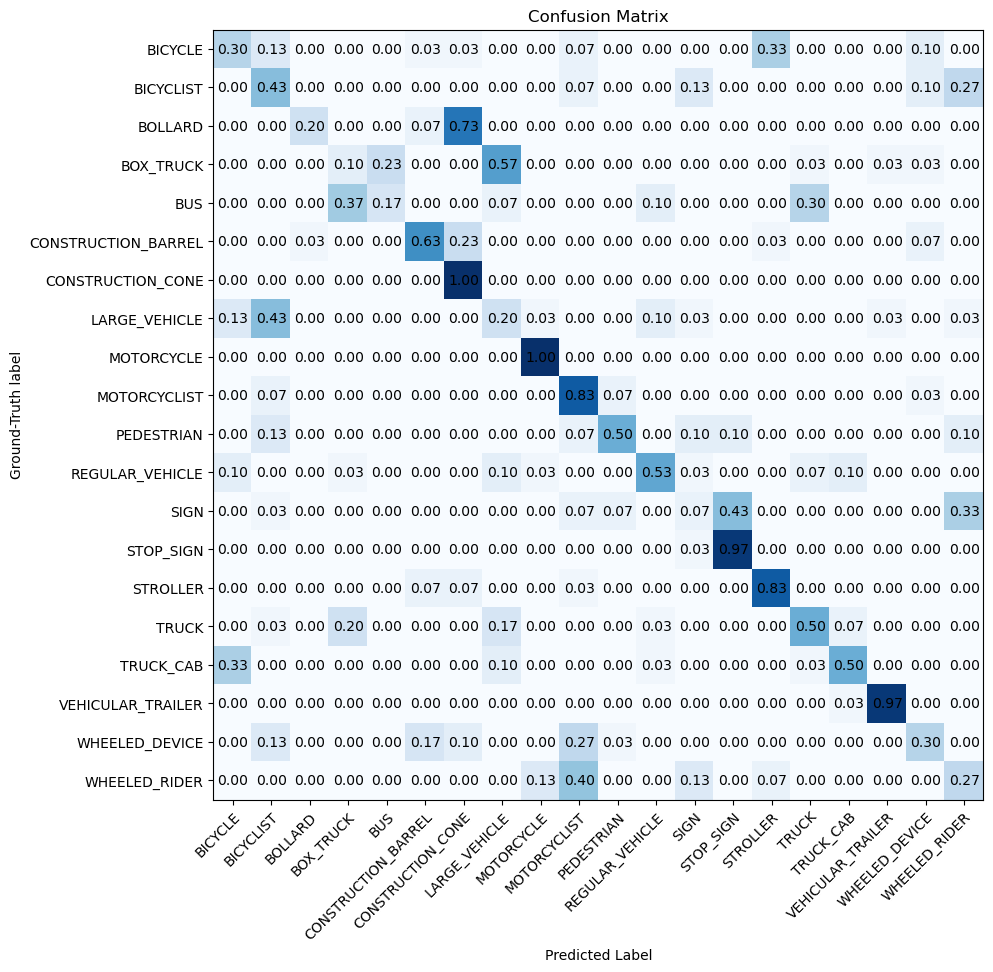

In [17]:
generate_and_plot_confusion_matrix(model, test_loader, 20)

Now lets visualize the critical points calculated by our model for the predestrian clouds from before. Recall that these are the points that contributed to the global feature. Why do you think these were the critical points the model ended up using? (Feel free to use different point clouds for your analysis)

In [18]:
plot_crit_points_from_file(model, 'data/sweeps/PEDESTRIAN/11.txt', 200)

ValueError: Expected more than 1 value per channel when training, got input size torch.Size([1, 1024])

## Part 5: Positional Encoding

Our basic PointNet model does pretty well. But let's see if we can do any better. One proposed solution to improve on the shortcomings of the basic PointNet model is using positional encoding (see pdf for more details). 

**TODO 5:** complete `part5_positional_encoding.py`

In [19]:
from vision.part5_positional_encoding import PointNetPosEncoding
from tests.test_part5 import (
    test_positional_encoding,
    test_pointnet_with_positional_encoding
)

In [20]:
print("test_positional_encoding(): ", verify(test_positional_encoding))
print("test_pointnet_with_positional_encoding(): ", verify(test_pointnet_with_positional_encoding))

test_positional_encoding():  "Wrong"
test_pointnet_with_positional_encoding():  "Correct"


Lets check out how our model performs now that we added positional encoding.

To get full credit for this section, you will need *$\geq$ 65% accuracy* on the test dataset. The TAs were able to consistently achieve this accuracy with ~10 epochs of training.

In [21]:
lr = 1e-4
weight_decay = 1e-5
epochs = 20

model = PointNetPosEncoding(classes=20)
optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

In [22]:
train_acc, train_loss, test_acc, test_loss = train(model, optimizer, epochs, train_loader, test_loader)

Epoch 1

Training...


100%|██████████| 213/213 [00:09<00:00, 21.62it/s]



Testing...


100%|██████████| 38/38 [00:01<00:00, 27.60it/s]



Epoch 1 Stats:
	Training accuracy: 0.4474
	Training loss: 1.8405
	Validation accuracy: 0.4233
	Validation loss: 1.8231

Validation accuracy improved from 0 to 0.4233333468437195
Saving model to PointNetPosEncoding.pt


Epoch 2

Training...


100%|██████████| 213/213 [00:11<00:00, 18.96it/s]



Testing...


100%|██████████| 38/38 [00:00<00:00, 45.11it/s]



Epoch 2 Stats:
	Training accuracy: 0.7012
	Training loss: 1.1313
	Validation accuracy: 0.4450
	Validation loss: 1.6931

Validation accuracy improved from 0.4233333468437195 to 0.4449999928474426
Saving model to PointNetPosEncoding.pt


Epoch 3

Training...


100%|██████████| 213/213 [00:10<00:00, 21.24it/s]



Testing...


100%|██████████| 38/38 [00:00<00:00, 45.38it/s]



Epoch 3 Stats:
	Training accuracy: 0.7926
	Training loss: 0.8149
	Validation accuracy: 0.4250
	Validation loss: 1.7809


Epoch 4

Training...


100%|██████████| 213/213 [00:09<00:00, 22.49it/s]



Testing...


100%|██████████| 38/38 [00:00<00:00, 46.07it/s]



Epoch 4 Stats:
	Training accuracy: 0.8635
	Training loss: 0.5896
	Validation accuracy: 0.4750
	Validation loss: 1.8013

Validation accuracy improved from 0.4449999928474426 to 0.4749999940395355
Saving model to PointNetPosEncoding.pt


Epoch 5

Training...


100%|██████████| 213/213 [00:09<00:00, 21.87it/s]



Testing...


100%|██████████| 38/38 [00:00<00:00, 45.44it/s]



Epoch 5 Stats:
	Training accuracy: 0.9241
	Training loss: 0.3996
	Validation accuracy: 0.4933
	Validation loss: 1.7279

Validation accuracy improved from 0.4749999940395355 to 0.4933333396911621
Saving model to PointNetPosEncoding.pt


Epoch 6

Training...


100%|██████████| 213/213 [00:09<00:00, 21.96it/s]



Testing...


100%|██████████| 38/38 [00:00<00:00, 43.10it/s]



Epoch 6 Stats:
	Training accuracy: 0.9579
	Training loss: 0.2753
	Validation accuracy: 0.4717
	Validation loss: 1.8359


Epoch 7

Training...


100%|██████████| 213/213 [00:09<00:00, 22.24it/s]



Testing...


100%|██████████| 38/38 [00:00<00:00, 40.94it/s]



Epoch 7 Stats:
	Training accuracy: 0.9774
	Training loss: 0.1954
	Validation accuracy: 0.4517
	Validation loss: 1.9058


Epoch 8

Training...


100%|██████████| 213/213 [00:10<00:00, 19.84it/s]



Testing...


100%|██████████| 38/38 [00:00<00:00, 44.45it/s]



Epoch 8 Stats:
	Training accuracy: 0.9891
	Training loss: 0.1289
	Validation accuracy: 0.4767
	Validation loss: 1.8739


Epoch 9

Training...


100%|██████████| 213/213 [00:10<00:00, 20.82it/s]



Testing...


100%|██████████| 38/38 [00:00<00:00, 42.91it/s]



Epoch 9 Stats:
	Training accuracy: 0.9959
	Training loss: 0.0943
	Validation accuracy: 0.4750
	Validation loss: 1.9531


Epoch 10

Training...


100%|██████████| 213/213 [00:10<00:00, 21.14it/s]



Testing...


100%|██████████| 38/38 [00:00<00:00, 42.93it/s]



Epoch 10 Stats:
	Training accuracy: 0.9968
	Training loss: 0.0778
	Validation accuracy: 0.4900
	Validation loss: 1.8938


Epoch 11

Training...


100%|██████████| 213/213 [00:10<00:00, 21.26it/s]



Testing...


100%|██████████| 38/38 [00:00<00:00, 44.07it/s]



Epoch 11 Stats:
	Training accuracy: 0.9974
	Training loss: 0.0588
	Validation accuracy: 0.4950
	Validation loss: 1.9272

Validation accuracy improved from 0.4933333396911621 to 0.4950000047683716
Saving model to PointNetPosEncoding.pt


Epoch 12

Training...


100%|██████████| 213/213 [00:10<00:00, 21.10it/s]



Testing...


100%|██████████| 38/38 [00:00<00:00, 44.54it/s]



Epoch 12 Stats:
	Training accuracy: 0.9959
	Training loss: 0.0509
	Validation accuracy: 0.4667
	Validation loss: 2.0431


Epoch 13

Training...


100%|██████████| 213/213 [00:09<00:00, 22.15it/s]



Testing...


100%|██████████| 38/38 [00:00<00:00, 44.94it/s]



Epoch 13 Stats:
	Training accuracy: 0.9982
	Training loss: 0.0430
	Validation accuracy: 0.4717
	Validation loss: 2.1096


Epoch 14

Training...


100%|██████████| 213/213 [00:09<00:00, 22.53it/s]



Testing...


100%|██████████| 38/38 [00:00<00:00, 45.03it/s]



Epoch 14 Stats:
	Training accuracy: 0.9991
	Training loss: 0.0338
	Validation accuracy: 0.4983
	Validation loss: 2.0580

Validation accuracy improved from 0.4950000047683716 to 0.4983333349227905
Saving model to PointNetPosEncoding.pt


Epoch 15

Training...


100%|██████████| 213/213 [00:10<00:00, 20.98it/s]



Testing...


100%|██████████| 38/38 [00:00<00:00, 38.88it/s]



Epoch 15 Stats:
	Training accuracy: 0.9988
	Training loss: 0.0333
	Validation accuracy: 0.4550
	Validation loss: 2.1926


Epoch 16

Training...


100%|██████████| 213/213 [00:10<00:00, 19.68it/s]



Testing...


100%|██████████| 38/38 [00:01<00:00, 37.31it/s]



Epoch 16 Stats:
	Training accuracy: 0.9988
	Training loss: 0.0253
	Validation accuracy: 0.4700
	Validation loss: 2.1655


Epoch 17

Training...


100%|██████████| 213/213 [00:09<00:00, 21.33it/s]



Testing...


100%|██████████| 38/38 [00:00<00:00, 42.85it/s]



Epoch 17 Stats:
	Training accuracy: 0.9979
	Training loss: 0.0252
	Validation accuracy: 0.4533
	Validation loss: 2.3297


Epoch 18

Training...


100%|██████████| 213/213 [00:09<00:00, 21.69it/s]



Testing...


100%|██████████| 38/38 [00:00<00:00, 41.21it/s]



Epoch 18 Stats:
	Training accuracy: 0.9965
	Training loss: 0.0314
	Validation accuracy: 0.4883
	Validation loss: 2.2636


Epoch 19

Training...


100%|██████████| 213/213 [00:09<00:00, 21.72it/s]



Testing...


100%|██████████| 38/38 [00:00<00:00, 39.46it/s]



Epoch 19 Stats:
	Training accuracy: 0.9965
	Training loss: 0.0381
	Validation accuracy: 0.4667
	Validation loss: 2.3919


Epoch 20

Training...


100%|██████████| 213/213 [00:09<00:00, 21.78it/s]



Testing...


100%|██████████| 38/38 [00:00<00:00, 44.05it/s]



Epoch 20 Stats:
	Training accuracy: 0.9974
	Training loss: 0.0318
	Validation accuracy: 0.4517
	Validation loss: 2.4973




In [23]:
model = torch.load('output/PointNetPosEncoding.pt')
test_acc, test_loss = test(model, test_loader)

100%|██████████| 38/38 [00:00<00:00, 45.09it/s]

Test accuracy: 0.4983
Test loss: 2.0810


Lets take a look at how the addition of positional encoding improved on the performance of our original PointNet model. Which classes does the positional encoding help the most with? Which ones does it not really seem to make much of a difference for? Why?

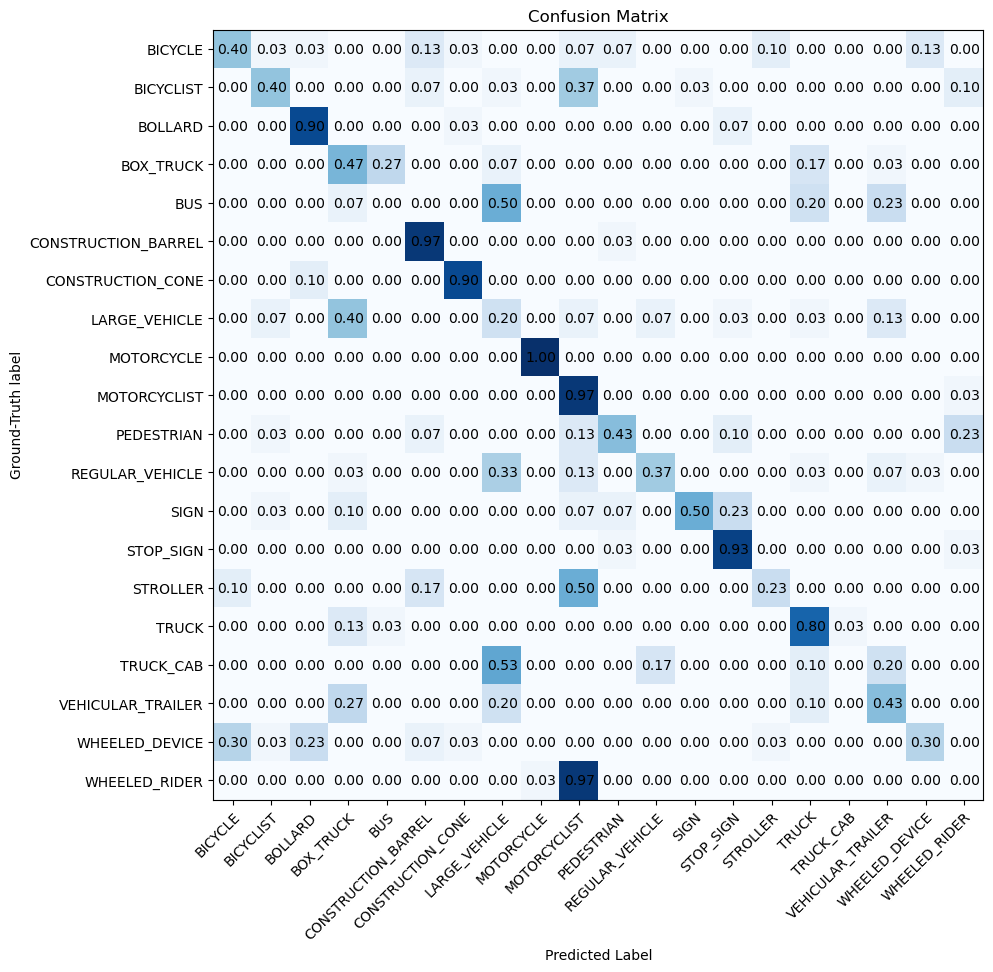

In [26]:
generate_and_plot_confusion_matrix(model, test_loader, 20)

In [27]:
plot_crit_points_from_file(model, 'data/sweeps/PEDESTRIAN/11.txt', 200)